<a href="https://colab.research.google.com/github/Gunturaa/svm-dt-breast-cancer/blob/main/SVM%26DT_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load dataset Breast Cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Melihat struktur data
print(df.head())
print(df.info())

# Split data menjadi training dan testing
X = df.drop('target', axis=1)
y = df['target']

# Standarisasi fitur (jika menggunakan SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Text(0.5, 1.0, 'Distribusi Diagnosis (0 = Ganas, 1 = Jinak)')

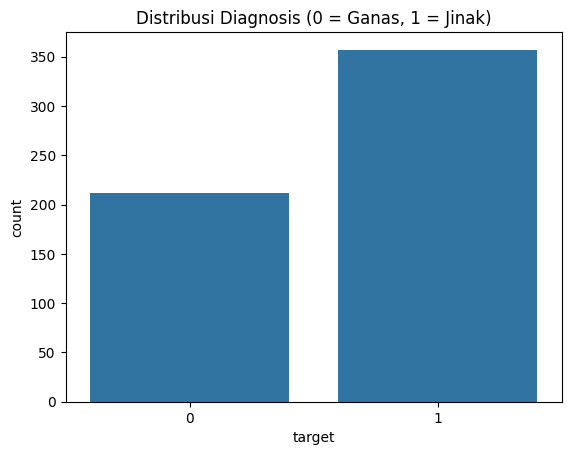

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Distribusi Diagnosis (0 = Ganas, 1 = Jinak)")


Text(0.5, 1.0, 'Matriks Korelasi')

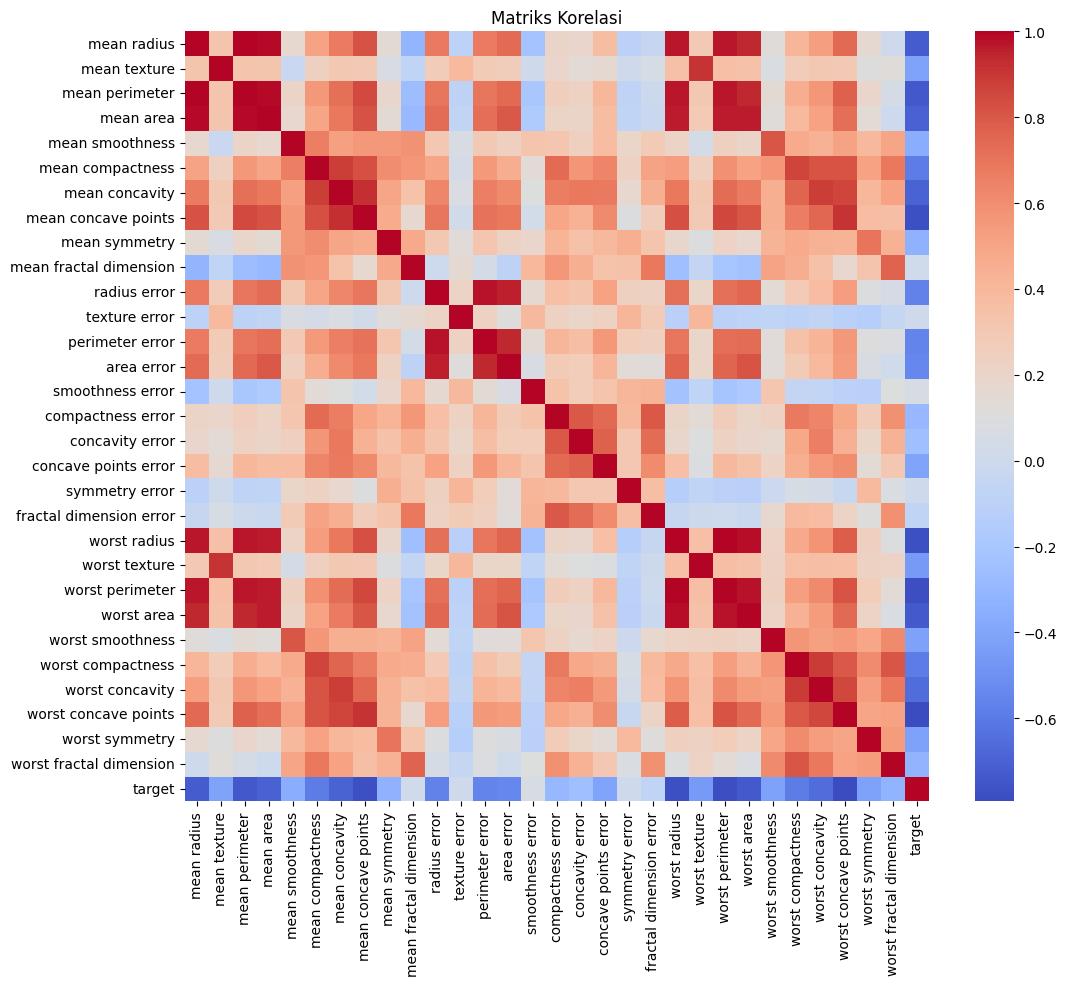

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Matriks Korelasi")


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Inisialisasi model SVM dan Decision Tree
svm_model = SVC(probability=True)  # untuk menghitung AUC, set probability=True
dt_model = DecisionTreeClassifier()

# Train Model SVM dan Decision Tree
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Prediksi hasil dan probabilitas untuk SVM
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas 1

# Prediksi hasil dan probabilitas untuk Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas 1



In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("AUC      :", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
# Evaluasi Model SVM
evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")

# Evaluasi Model Decision Tree
evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")



SVM Performance:
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465
F1 Score : 0.9790209790209791
AUC      : 0.99737962659679
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Performance:
Accuracy : 0.9385964912280702
Precision: 0.9444444444444444
Recall   : 0.9577464788732394
F1 Score : 0.951048951048951
AUC      : 0.932361611529643
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted av

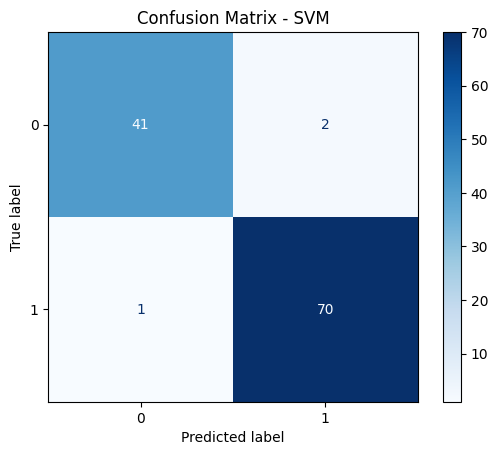

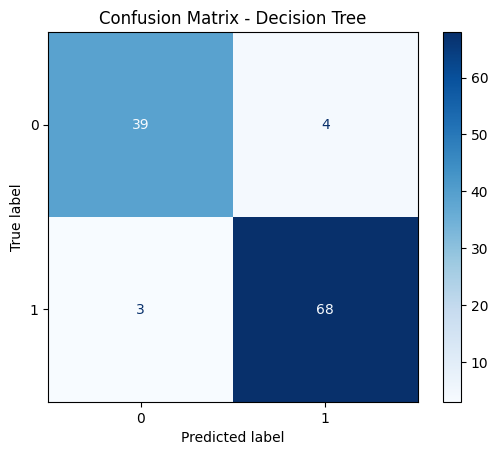

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi Confusion Matrix untuk SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

# Visualisasi Confusion Matrix untuk Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

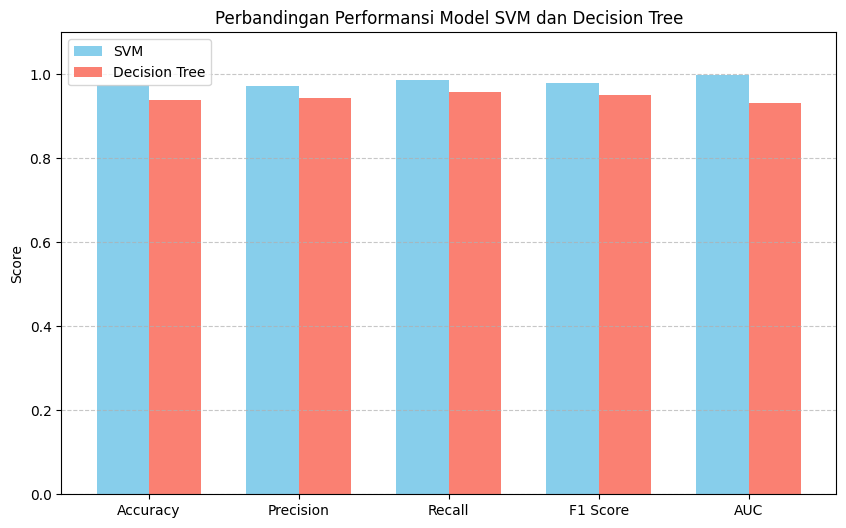

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_metrics(y_test, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

# Ambil metrik untuk masing-masing model
metrics_svm = get_metrics(y_test, y_pred_svm, y_prob_svm)
metrics_dt = get_metrics(y_test, y_pred_dt, y_prob_dt)

# Siapkan data untuk plot
metrics_names = list(metrics_svm.keys())
svm_scores = list(metrics_svm.values())
dt_scores = list(metrics_dt.values())

x = range(len(metrics_names))  # Posisi label

# Buat bar plot
plt.figure(figsize=(10,6))
width = 0.35

plt.bar([p - width/2 for p in x], svm_scores, width=width, label='SVM', color='skyblue')
plt.bar([p + width/2 for p in x], dt_scores, width=width, label='Decision Tree', color='salmon')

plt.xticks(x, metrics_names)
plt.ylim(0,1.1)
plt.ylabel('Score')
plt.title('Perbandingan Performansi Model SVM dan Decision Tree')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

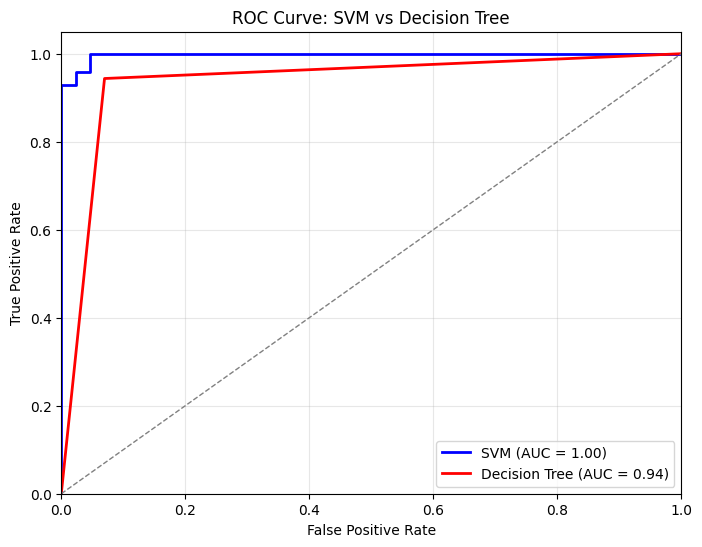

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hitung false positive rate (fpr), true positive rate (tpr), dan threshold untuk masing-masing model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Garis diagonal (random guess)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM vs Decision Tree')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.show()
